In [12]:
# steps: https://github.com/lk-chen/detectron2-ResNeSt/blob/resnest/INSTALL.md

!sudo pip3 install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip3 install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

1.5.0+cu101 True
gcc (Debian 6.3.0-18+deb9u1) 6.3.0 20170516
Copyright (C) 2016 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [8]:
!(cd detectron2-ResNeSt && python3 -m pip install -e .)

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///home/lk_chen93/cs231n_project/detectron2-ResNeSt
     |████████████████████████████████| 12.4 MB 9.4 MB/s eta 0:00:01    |███████                         | 2.7 MB 9.4 MB/s eta 0:00:02     |██████████████████████████▏     | 10.2 MB 9.4 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 2.3 MB/s  eta 0:00:01
     |████████████████████████████████| 3.0 MB 30.3 MB/s eta 0:00:01
     |████████████████████████████████| 269 kB 35.0 MB/s eta 0:00:01
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
     |████████████████████████████████| 88 kB 10.0 MB/s eta 0:00:01
     |████████████████████████████████| 298 kB 26.7 MB/s eta 0:00:01
  Using cached setuptools-46.4.0-py3-none-any.whl (583 kB)
     |████████████████████████████████| 88 kB 9.0 MB/s  eta 0:00:01
  Using cached requests-2.23.0-py2.py3-none-any.whl (58

In [3]:
# To be backward compatible, try_zhanghang_detectron2 always use resnest-50
!sed 's/config_path_placeholder/kitti-faster-rcnn-resnest-50/' try_zhanghang_detectron2_template.sh > try_zhanghang_detectron2.sh
!bash try_zhanghang_detectron2.sh
!cp detectron2-ResNeSt/output/model_final.pth resnest_50.pth

Command Line Args: Namespace(config_file='configs/kitti/kitti-faster-rcnn-resnest-50.yaml', dist_url='tcp://127.0.0.1:60904', eval_only=False, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', 'output/model_final.pth'], resume=False)
[05/19 16:55:46 detectron2:104]: Rank of current process: 0. World size: 1
[05/19 16:55:46 detectron2:105]: Environment info:
------------------------  ----------------------------------------------------------------------------------------
sys.platform              linux
Python                    3.7.7 (default, Mar 10 2020, 13:18:53) [GCC 9.2.1 20191109]
numpy                     1.18.2
detectron2                0.1.1 @/usr/local/google/home/lkchen/cs231n/cs231n_project/detectron2-ResNeSt/detectron2
detectron2 compiler       GCC 9.2
detectron2 CUDA compiler  10.2
detectron2 arch flags     sm_52
DETECTRON2_ENV_MODULE     <not set>
PyTorch                   1.5.0 @/usr/local/google/home/lkchen/.local/lib/python3.7/site-packages/torch
PyTor

[05/19 16:55:46 detectron2:122]: Full config saved to ./output/config.yaml
[05/19 16:55:46 d2.utils.env:29]: Using a generated random seed 46910269
[05/19 16:55:49 d2.engine.defaults:399]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(
      256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_output2): Conv2d(
      256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_lateral3): Conv2d(
      512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_output3): Conv2d(
      256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momen

[05/19 16:55:50 d2.data.build:63]: Removed 0 images with no usable annotations. 5415 images left.
[05/19 16:55:50 d2.data.build:164]: Distribution of instances among all 10 categories:
|   category    | #instances   |  category  | #instances   |  category  | #instances   |
|:-------------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|      car      | 20609        |    van     | 2407         |   truck    | 965          |
|  pedestrian   | 0            |   person   | 2477         |  cyclist   | 1042         |
|     tram      | 511          |    misc    | 877          |  dontcare  | 8373         |
| person_sitt.. | 222          |            |              |            |              |
|     total     | 37483        |            |              |            |              |
[05/19 16:55:50 d2.data.common:88]: Serializing 5415 elements to byte tensors and concatenating them all ...
[05/19 16:55:50 d2.data.common:95]: Serialized dataset takes 3.53 MiB
[05/19 16:55:

[05/19 16:56:30 d2.utils.events:215]:  eta: 0:05:47  iter: 19  total_loss: 1.415  loss_cls: 0.626  loss_box_reg: 0.235  loss_rpn_cls: 0.327  loss_rpn_loc: 0.075  time: 1.9359  data_time: 0.0094  lr: 0.005000  max_mem: 2926M
[05/19 16:57:10 d2.utils.events:215]:  eta: 0:05:15  iter: 39  total_loss: 1.171  loss_cls: 0.507  loss_box_reg: 0.410  loss_rpn_cls: 0.209  loss_rpn_loc: 0.076  time: 1.9562  data_time: 0.0043  lr: 0.005000  max_mem: 2926M
[05/19 16:57:29 d2.engine.hooks:491]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/19 16:58:33 d2.engine.hooks:483]: Running precise-BN ... 100/200 iterations.
[05/19 16:59:38 d2.engine.hooks:483]: Running precise-BN ... 200/200 iterations.
[05/19 16:59:39 d2.data.common:88]: Serializing 10 elements to byte tensors and concatenating them all ...
[05/19 16:59:39 d2.data.common:95]: Serialized dataset takes 0.01 MiB
[05/19 16:59:39 d2.evaluation.evaluator:123]: Start inference on 10 ima

In [ ]:
!sed 's/config_path_placeholder/kitti-faster-rcnn-resnest-101/' try_zhanghang_detectron2_template.sh > try_zhanghang_detectron2_resnest_101.sh
!bash try_zhanghang_detectron2_resnest_101.sh
!cp detectron2-ResNeSt/output/model_final.pth resnest_101.pth

Command Line Args: Namespace(config_file='configs/kitti/kitti-faster-rcnn-resnest-101.yaml', dist_url='tcp://127.0.0.1:50153', eval_only=False, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', 'output/model_final.pth'], resume=False)
[05/20 09:37:13 detectron2:104]: Rank of current process: 0. World size: 1
[05/20 09:37:14 detectron2:105]: Environment info:
------------------------  ---------------------------------------------------------------------------
sys.platform              linux
Python                    3.7.3 (default, May 18 2020, 08:41:38) [GCC 6.3.0 20170516]
numpy                     1.18.4
detectron2                0.1.1 @/home/lk_chen93/cs231n_project/detectron2-ResNeSt/detectron2
detectron2 compiler       GCC 6.3
detectron2 CUDA compiler  10.1
detectron2 arch flags     sm_70
DETECTRON2_ENV_MODULE     <not set>
PyTorch                   1.5.0+cu101 @/home/lk_chen93/.local/lib/python3.7/site-packages/torch
PyTorch debug build       False
CUDA available

[05/20 09:37:19 d2.engine.defaults:399]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(
      256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_output2): Conv2d(
      256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_lateral3): Conv2d(
      512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_output3): Conv2d(
      256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_lateral4): Conv2d(
      1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
   

[05/20 09:37:20 d2.data.build:63]: Removed 0 images with no usable annotations. 5415 images left.
[05/20 09:37:20 d2.data.build:164]: Distribution of instances among all 10 categories:
|   category    | #instances   |  category  | #instances   |  category  | #instances   |
|:-------------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|      car      | 20609        |    van     | 2407         |   truck    | 965          |
|  pedestrian   | 0            |   person   | 2477         |  cyclist   | 1042         |
|     tram      | 511          |    misc    | 877          |  dontcare  | 8373         |
| person_sitt.. | 222          |            |              |            |              |
|     total     | 37483        |            |              |            |              |
[05/20 09:37:20 d2.data.common:88]: Serializing 5415 elements to byte tensors and concatenating them all ...
[05/20 09:37:20 d2.data.common:95]: Serialized dataset takes 3.53 MiB
[05/20 09:37:

[05/20 09:45:40 d2.utils.events:215]:  eta: 5:34:17  iter: 579  total_loss: 0.545  loss_cls: 0.154  loss_box_reg: 0.333  loss_rpn_cls: 0.017  loss_rpn_loc: 0.048  time: 0.8567  data_time: 0.0380  lr: 0.005000  max_mem: 14173M
[05/20 09:45:57 d2.utils.events:215]:  eta: 5:34:00  iter: 599  total_loss: 0.516  loss_cls: 0.147  loss_box_reg: 0.307  loss_rpn_cls: 0.015  loss_rpn_loc: 0.048  time: 0.8568  data_time: 0.0457  lr: 0.005000  max_mem: 14173M
[05/20 09:45:58 d2.engine.hooks:492]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/20 09:46:55 d2.engine.hooks:484]: Running precise-BN ... 100/200 iterations.
[05/20 09:47:53 d2.engine.hooks:484]: Running precise-BN ... 200/200 iterations.
[05/20 09:47:54 d2.data.common:88]: Serializing 2064 elements to byte tensors and concatenating them all ...
[05/20 09:47:54 d2.data.common:95]: Serialized dataset takes 1.35 MiB
[05/20 09:47:54 d2.evaluation.evaluator:123]: Start inference on 

[05/20 09:51:23 d2.engine.hooks:197]: Loss on Validation  done 140/258. 0.0000 s / img. ETA=0:00:47
[05/20 09:51:28 d2.engine.hooks:197]: Loss on Validation  done 153/258. 0.0000 s / img. ETA=0:00:42
[05/20 09:51:33 d2.engine.hooks:197]: Loss on Validation  done 166/258. 0.0000 s / img. ETA=0:00:37
[05/20 09:51:39 d2.engine.hooks:197]: Loss on Validation  done 179/258. 0.0000 s / img. ETA=0:00:32
[05/20 09:51:44 d2.engine.hooks:197]: Loss on Validation  done 192/258. 0.0000 s / img. ETA=0:00:26
[05/20 09:51:49 d2.engine.hooks:197]: Loss on Validation  done 205/258. 0.0000 s / img. ETA=0:00:21
[05/20 09:51:55 d2.engine.hooks:197]: Loss on Validation  done 218/258. 0.0000 s / img. ETA=0:00:16
[05/20 09:52:00 d2.engine.hooks:197]: Loss on Validation  done 231/258. 0.0000 s / img. ETA=0:00:10
[05/20 09:52:05 d2.engine.hooks:197]: Loss on Validation  done 244/258. 0.0000 s / img. ETA=0:00:05
[05/20 09:52:10 d2.engine.hooks:197]: Loss on Validation  done 257/258. 0.0000 s / img. ETA=0:00:00


[05/20 10:00:30 d2.utils.events:215]:  eta: 5:26:28  iter: 1179  total_loss: 0.595  loss_cls: 0.164  loss_box_reg: 0.349  loss_rpn_cls: 0.018  loss_rpn_loc: 0.057  validation_loss: 1.170  time: 0.8583  data_time: 0.0363  lr: 0.005000  max_mem: 14173M
[05/20 10:00:47 d2.utils.events:215]:  eta: 5:26:12  iter: 1199  total_loss: 0.539  loss_cls: 0.149  loss_box_reg: 0.335  loss_rpn_cls: 0.014  loss_rpn_loc: 0.047  validation_loss: 1.170  time: 0.8583  data_time: 0.0400  lr: 0.005000  max_mem: 14173M
[05/20 10:00:49 d2.engine.hooks:492]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/20 10:01:45 d2.engine.hooks:484]: Running precise-BN ... 100/200 iterations.
[05/20 10:02:43 d2.engine.hooks:484]: Running precise-BN ... 200/200 iterations.
[05/20 10:02:44 d2.data.common:88]: Serializing 2064 elements to byte tensors and concatenating them all ...
[05/20 10:02:44 d2.data.common:95]: Serialized dataset takes 1.35 MiB
[05/20 10:02:44

[05/20 10:06:15 d2.engine.hooks:197]: Loss on Validation  done 141/258. 0.0000 s / img. ETA=0:00:47
[05/20 10:06:20 d2.engine.hooks:197]: Loss on Validation  done 154/258. 0.0000 s / img. ETA=0:00:42
[05/20 10:06:26 d2.engine.hooks:197]: Loss on Validation  done 167/258. 0.0000 s / img. ETA=0:00:36
[05/20 10:06:31 d2.engine.hooks:197]: Loss on Validation  done 180/258. 0.0000 s / img. ETA=0:00:31
[05/20 10:06:36 d2.engine.hooks:197]: Loss on Validation  done 193/258. 0.0000 s / img. ETA=0:00:26
[05/20 10:06:42 d2.engine.hooks:197]: Loss on Validation  done 206/258. 0.0000 s / img. ETA=0:00:21
[05/20 10:06:47 d2.engine.hooks:197]: Loss on Validation  done 219/258. 0.0000 s / img. ETA=0:00:15
[05/20 10:06:52 d2.engine.hooks:197]: Loss on Validation  done 232/258. 0.0000 s / img. ETA=0:00:10
[05/20 10:06:57 d2.engine.hooks:197]: Loss on Validation  done 245/258. 0.0000 s / img. ETA=0:00:05
[05/20 10:07:03 d2.engine.hooks:197]: Loss on Validation  done 258/258. 0.0000 s / img. ETA=0:00:00


[05/20 10:15:21 d2.utils.events:215]:  eta: 5:18:19  iter: 1779  total_loss: 0.500  loss_cls: 0.137  loss_box_reg: 0.298  loss_rpn_cls: 0.014  loss_rpn_loc: 0.049  validation_loss: 1.164  time: 0.8586  data_time: 0.0422  lr: 0.005000  max_mem: 14173M
[05/20 10:15:38 d2.utils.events:215]:  eta: 5:18:04  iter: 1799  total_loss: 0.519  loss_cls: 0.143  loss_box_reg: 0.317  loss_rpn_cls: 0.015  loss_rpn_loc: 0.045  validation_loss: 1.164  time: 0.8587  data_time: 0.0446  lr: 0.005000  max_mem: 14173M
[05/20 10:15:41 d2.engine.hooks:492]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/20 10:16:37 d2.engine.hooks:484]: Running precise-BN ... 100/200 iterations.
[05/20 10:17:35 d2.engine.hooks:484]: Running precise-BN ... 200/200 iterations.
[05/20 10:17:36 d2.data.common:88]: Serializing 2064 elements to byte tensors and concatenating them all ...
[05/20 10:17:36 d2.data.common:95]: Serialized dataset takes 1.35 MiB
[05/20 10:17:36

[05/20 10:21:06 d2.engine.hooks:197]: Loss on Validation  done 141/258. 0.0000 s / img. ETA=0:00:47
[05/20 10:21:12 d2.engine.hooks:197]: Loss on Validation  done 154/258. 0.0000 s / img. ETA=0:00:42
[05/20 10:21:17 d2.engine.hooks:197]: Loss on Validation  done 167/258. 0.0000 s / img. ETA=0:00:37
[05/20 10:21:22 d2.engine.hooks:197]: Loss on Validation  done 180/258. 0.0000 s / img. ETA=0:00:31
[05/20 10:21:28 d2.engine.hooks:197]: Loss on Validation  done 193/258. 0.0000 s / img. ETA=0:00:26
[05/20 10:21:33 d2.engine.hooks:197]: Loss on Validation  done 206/258. 0.0000 s / img. ETA=0:00:21
[05/20 10:21:38 d2.engine.hooks:197]: Loss on Validation  done 219/258. 0.0000 s / img. ETA=0:00:15
[05/20 10:21:44 d2.engine.hooks:197]: Loss on Validation  done 232/258. 0.0000 s / img. ETA=0:00:10
[05/20 10:21:49 d2.engine.hooks:197]: Loss on Validation  done 245/258. 0.0000 s / img. ETA=0:00:05
[05/20 10:21:54 d2.engine.hooks:197]: Loss on Validation  done 258/258. 0.0000 s / img. ETA=0:00:00


[05/20 10:30:13 d2.utils.events:215]:  eta: 5:10:09  iter: 2379  total_loss: 0.542  loss_cls: 0.148  loss_box_reg: 0.312  loss_rpn_cls: 0.013  loss_rpn_loc: 0.050  validation_loss: 1.172  time: 0.8594  data_time: 0.0463  lr: 0.005000  max_mem: 14173M
[05/20 10:30:30 d2.utils.events:215]:  eta: 5:09:59  iter: 2399  total_loss: 0.507  loss_cls: 0.140  loss_box_reg: 0.313  loss_rpn_cls: 0.014  loss_rpn_loc: 0.053  validation_loss: 1.172  time: 0.8595  data_time: 0.0413  lr: 0.005000  max_mem: 14173M
[05/20 10:30:33 d2.engine.hooks:492]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/20 10:31:30 d2.engine.hooks:484]: Running precise-BN ... 100/200 iterations.
[05/20 10:32:28 d2.engine.hooks:484]: Running precise-BN ... 200/200 iterations.
[05/20 10:32:28 d2.data.common:88]: Serializing 2064 elements to byte tensors and concatenating them all ...
[05/20 10:32:28 d2.data.common:95]: Serialized dataset takes 1.35 MiB
[05/20 10:32:28

[05/20 10:35:58 d2.engine.hooks:197]: Loss on Validation  done 141/258. 0.0000 s / img. ETA=0:00:47
[05/20 10:36:03 d2.engine.hooks:197]: Loss on Validation  done 154/258. 0.0000 s / img. ETA=0:00:42
[05/20 10:36:09 d2.engine.hooks:197]: Loss on Validation  done 167/258. 0.0000 s / img. ETA=0:00:37
[05/20 10:36:14 d2.engine.hooks:197]: Loss on Validation  done 180/258. 0.0000 s / img. ETA=0:00:31
[05/20 10:36:20 d2.engine.hooks:197]: Loss on Validation  done 193/258. 0.0000 s / img. ETA=0:00:26
[05/20 10:36:25 d2.engine.hooks:197]: Loss on Validation  done 206/258. 0.0000 s / img. ETA=0:00:21
[05/20 10:36:30 d2.engine.hooks:197]: Loss on Validation  done 218/258. 0.0000 s / img. ETA=0:00:16
[05/20 10:36:35 d2.engine.hooks:197]: Loss on Validation  done 231/258. 0.0000 s / img. ETA=0:00:11
[05/20 10:36:40 d2.engine.hooks:197]: Loss on Validation  done 244/258. 0.0000 s / img. ETA=0:00:05
[05/20 10:36:46 d2.engine.hooks:197]: Loss on Validation  done 257/258. 0.0000 s / img. ETA=0:00:00


[05/20 10:45:05 d2.utils.events:215]:  eta: 5:02:26  iter: 2979  total_loss: 0.526  loss_cls: 0.147  loss_box_reg: 0.307  loss_rpn_cls: 0.014  loss_rpn_loc: 0.045  validation_loss: 1.196  time: 0.8603  data_time: 0.0475  lr: 0.005000  max_mem: 14173M
[05/20 10:45:22 d2.utils.events:215]:  eta: 5:02:16  iter: 2999  total_loss: 0.509  loss_cls: 0.143  loss_box_reg: 0.308  loss_rpn_cls: 0.014  loss_rpn_loc: 0.048  validation_loss: 1.196  time: 0.8603  data_time: 0.0424  lr: 0.005000  max_mem: 14173M
[05/20 10:45:27 d2.engine.hooks:492]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/20 10:46:23 d2.engine.hooks:484]: Running precise-BN ... 100/200 iterations.
[05/20 10:47:21 d2.engine.hooks:484]: Running precise-BN ... 200/200 iterations.
[05/20 10:47:22 d2.data.common:88]: Serializing 2064 elements to byte tensors and concatenating them all ...
[05/20 10:47:22 d2.data.common:95]: Serialized dataset takes 1.35 MiB
[05/20 10:47:22

[05/20 10:50:52 d2.engine.hooks:197]: Loss on Validation  done 141/258. 0.0000 s / img. ETA=0:00:47
[05/20 10:50:58 d2.engine.hooks:197]: Loss on Validation  done 154/258. 0.0000 s / img. ETA=0:00:42
[05/20 10:51:03 d2.engine.hooks:197]: Loss on Validation  done 167/258. 0.0000 s / img. ETA=0:00:37
[05/20 10:51:08 d2.engine.hooks:197]: Loss on Validation  done 180/258. 0.0000 s / img. ETA=0:00:31
[05/20 10:51:14 d2.engine.hooks:197]: Loss on Validation  done 193/258. 0.0000 s / img. ETA=0:00:26
[05/20 10:51:19 d2.engine.hooks:197]: Loss on Validation  done 206/258. 0.0000 s / img. ETA=0:00:21
[05/20 10:51:24 d2.engine.hooks:197]: Loss on Validation  done 219/258. 0.0000 s / img. ETA=0:00:15
[05/20 10:51:30 d2.engine.hooks:197]: Loss on Validation  done 232/258. 0.0000 s / img. ETA=0:00:10
[05/20 10:51:35 d2.engine.hooks:197]: Loss on Validation  done 244/258. 0.0000 s / img. ETA=0:00:05
[05/20 10:51:40 d2.engine.hooks:197]: Loss on Validation  done 257/258. 0.0000 s / img. ETA=0:00:00


[05/20 10:59:58 d2.utils.events:215]:  eta: 4:53:56  iter: 3579  total_loss: 0.497  loss_cls: 0.126  loss_box_reg: 0.295  loss_rpn_cls: 0.011  loss_rpn_loc: 0.045  validation_loss: 1.236  time: 0.8608  data_time: 0.0423  lr: 0.005000  max_mem: 14173M
[05/20 11:00:15 d2.utils.events:215]:  eta: 4:53:41  iter: 3599  total_loss: 0.467  loss_cls: 0.121  loss_box_reg: 0.289  loss_rpn_cls: 0.012  loss_rpn_loc: 0.045  validation_loss: 1.236  time: 0.8608  data_time: 0.0450  lr: 0.005000  max_mem: 14173M
[05/20 11:00:21 d2.engine.hooks:492]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/20 11:01:18 d2.engine.hooks:484]: Running precise-BN ... 100/200 iterations.
[05/20 11:02:15 d2.engine.hooks:484]: Running precise-BN ... 200/200 iterations.
[05/20 11:02:16 d2.data.common:88]: Serializing 2064 elements to byte tensors and concatenating them all ...
[05/20 11:02:16 d2.data.common:95]: Serialized dataset takes 1.35 MiB
[05/20 11:02:16

[05/20 11:05:45 d2.engine.hooks:197]: Loss on Validation  done 141/258. 0.0000 s / img. ETA=0:00:47
[05/20 11:05:50 d2.engine.hooks:197]: Loss on Validation  done 154/258. 0.0001 s / img. ETA=0:00:42
[05/20 11:05:55 d2.engine.hooks:197]: Loss on Validation  done 167/258. 0.0001 s / img. ETA=0:00:37
[05/20 11:06:01 d2.engine.hooks:197]: Loss on Validation  done 180/258. 0.0001 s / img. ETA=0:00:31
[05/20 11:06:06 d2.engine.hooks:197]: Loss on Validation  done 193/258. 0.0000 s / img. ETA=0:00:26
[05/20 11:06:11 d2.engine.hooks:197]: Loss on Validation  done 206/258. 0.0000 s / img. ETA=0:00:21
[05/20 11:06:17 d2.engine.hooks:197]: Loss on Validation  done 219/258. 0.0000 s / img. ETA=0:00:15
[05/20 11:06:22 d2.engine.hooks:197]: Loss on Validation  done 232/258. 0.0000 s / img. ETA=0:00:10
[05/20 11:06:27 d2.engine.hooks:197]: Loss on Validation  done 245/258. 0.0000 s / img. ETA=0:00:05
[05/20 11:06:33 d2.engine.hooks:197]: Loss on Validation  done 258/258. 0.0000 s / img. ETA=0:00:00


[05/20 11:14:49 d2.utils.events:215]:  eta: 4:44:58  iter: 4179  total_loss: 0.503  loss_cls: 0.134  loss_box_reg: 0.309  loss_rpn_cls: 0.013  loss_rpn_loc: 0.045  validation_loss: 1.194  time: 0.8612  data_time: 0.0474  lr: 0.005000  max_mem: 14173M
[05/20 11:15:07 d2.utils.events:215]:  eta: 4:44:46  iter: 4199  total_loss: 0.480  loss_cls: 0.127  loss_box_reg: 0.289  loss_rpn_cls: 0.011  loss_rpn_loc: 0.053  validation_loss: 1.194  time: 0.8612  data_time: 0.0483  lr: 0.005000  max_mem: 14173M
[05/20 11:15:13 d2.engine.hooks:492]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/20 11:16:10 d2.engine.hooks:484]: Running precise-BN ... 100/200 iterations.
[05/20 11:17:07 d2.engine.hooks:484]: Running precise-BN ... 200/200 iterations.
[05/20 11:17:08 d2.data.common:88]: Serializing 2064 elements to byte tensors and concatenating them all ...
[05/20 11:17:08 d2.data.common:95]: Serialized dataset takes 1.35 MiB
[05/20 11:17:08

[05/20 11:20:38 d2.engine.hooks:197]: Loss on Validation  done 141/258. 0.0000 s / img. ETA=0:00:47
[05/20 11:20:43 d2.engine.hooks:197]: Loss on Validation  done 154/258. 0.0000 s / img. ETA=0:00:42
[05/20 11:20:48 d2.engine.hooks:197]: Loss on Validation  done 167/258. 0.0000 s / img. ETA=0:00:37
[05/20 11:20:54 d2.engine.hooks:197]: Loss on Validation  done 180/258. 0.0000 s / img. ETA=0:00:31
[05/20 11:20:59 d2.engine.hooks:197]: Loss on Validation  done 193/258. 0.0000 s / img. ETA=0:00:26
[05/20 11:21:05 d2.engine.hooks:197]: Loss on Validation  done 206/258. 0.0000 s / img. ETA=0:00:21
[05/20 11:21:10 d2.engine.hooks:197]: Loss on Validation  done 219/258. 0.0000 s / img. ETA=0:00:15
[05/20 11:21:15 d2.engine.hooks:197]: Loss on Validation  done 232/258. 0.0000 s / img. ETA=0:00:10
[05/20 11:21:21 d2.engine.hooks:197]: Loss on Validation  done 245/258. 0.0000 s / img. ETA=0:00:05
[05/20 11:21:26 d2.engine.hooks:197]: Loss on Validation  done 258/258. 0.0000 s / img. ETA=0:00:00


[05/20 11:29:41 d2.utils.events:215]:  eta: 4:36:19  iter: 4779  total_loss: 0.473  loss_cls: 0.132  loss_box_reg: 0.279  loss_rpn_cls: 0.011  loss_rpn_loc: 0.047  validation_loss: 1.196  time: 0.8614  data_time: 0.0439  lr: 0.005000  max_mem: 14173M
[05/20 11:29:59 d2.utils.events:215]:  eta: 4:35:56  iter: 4799  total_loss: 0.448  loss_cls: 0.111  loss_box_reg: 0.288  loss_rpn_cls: 0.009  loss_rpn_loc: 0.049  validation_loss: 1.196  time: 0.8614  data_time: 0.0396  lr: 0.005000  max_mem: 14173M
[05/20 11:30:06 d2.engine.hooks:492]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/20 11:31:03 d2.engine.hooks:484]: Running precise-BN ... 100/200 iterations.
[05/20 11:32:01 d2.engine.hooks:484]: Running precise-BN ... 200/200 iterations.
[05/20 11:32:02 d2.data.common:88]: Serializing 2064 elements to byte tensors and concatenating them all ...
[05/20 11:32:02 d2.data.common:95]: Serialized dataset takes 1.35 MiB
[05/20 11:32:02

[05/20 11:35:32 d2.engine.hooks:197]: Loss on Validation  done 141/258. 0.0000 s / img. ETA=0:00:47
[05/20 11:35:37 d2.engine.hooks:197]: Loss on Validation  done 154/258. 0.0000 s / img. ETA=0:00:42
[05/20 11:35:42 d2.engine.hooks:197]: Loss on Validation  done 167/258. 0.0000 s / img. ETA=0:00:37
[05/20 11:35:48 d2.engine.hooks:197]: Loss on Validation  done 180/258. 0.0000 s / img. ETA=0:00:31
[05/20 11:35:53 d2.engine.hooks:197]: Loss on Validation  done 193/258. 0.0000 s / img. ETA=0:00:26
[05/20 11:35:59 d2.engine.hooks:197]: Loss on Validation  done 206/258. 0.0000 s / img. ETA=0:00:21
[05/20 11:36:04 d2.engine.hooks:197]: Loss on Validation  done 219/258. 0.0000 s / img. ETA=0:00:15
[05/20 11:36:09 d2.engine.hooks:197]: Loss on Validation  done 232/258. 0.0000 s / img. ETA=0:00:10
[05/20 11:36:15 d2.engine.hooks:197]: Loss on Validation  done 245/258. 0.0000 s / img. ETA=0:00:05
[05/20 11:36:20 d2.engine.hooks:197]: Loss on Validation  done 258/258. 0.0000 s / img. ETA=0:00:00


[05/20 11:44:17 d2.utils.events:215]:  eta: 4:27:44  iter: 5359  total_loss: 0.496  loss_cls: 0.136  loss_box_reg: 0.293  loss_rpn_cls: 0.015  loss_rpn_loc: 0.045  validation_loss: 1.224  time: 0.8614  data_time: 0.0460  lr: 0.005000  max_mem: 14173M
[05/20 11:44:35 d2.utils.events:215]:  eta: 4:27:26  iter: 5379  total_loss: 0.490  loss_cls: 0.131  loss_box_reg: 0.295  loss_rpn_cls: 0.013  loss_rpn_loc: 0.046  validation_loss: 1.224  time: 0.8614  data_time: 0.0434  lr: 0.005000  max_mem: 14173M
[05/20 11:44:52 d2.utils.events:215]:  eta: 4:27:09  iter: 5399  total_loss: 0.457  loss_cls: 0.118  loss_box_reg: 0.283  loss_rpn_cls: 0.010  loss_rpn_loc: 0.041  validation_loss: 1.224  time: 0.8614  data_time: 0.0453  lr: 0.005000  max_mem: 14173M
[05/20 11:45:00 d2.engine.hooks:492]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/20 11:45:57 d2.engine.hooks:484]: Running precise-BN ... 100/200 iterations.
[05/20 11:46:54 d2.engin

[05/20 11:50:16 d2.engine.hooks:197]: Loss on Validation  done 115/258. 0.0000 s / img. ETA=0:00:58
[05/20 11:50:22 d2.engine.hooks:197]: Loss on Validation  done 128/258. 0.0000 s / img. ETA=0:00:52
[05/20 11:50:27 d2.engine.hooks:197]: Loss on Validation  done 141/258. 0.0000 s / img. ETA=0:00:47
[05/20 11:50:32 d2.engine.hooks:197]: Loss on Validation  done 154/258. 0.0000 s / img. ETA=0:00:42
[05/20 11:50:38 d2.engine.hooks:197]: Loss on Validation  done 167/258. 0.0000 s / img. ETA=0:00:37
[05/20 11:50:43 d2.engine.hooks:197]: Loss on Validation  done 180/258. 0.0000 s / img. ETA=0:00:31
[05/20 11:50:48 d2.engine.hooks:197]: Loss on Validation  done 193/258. 0.0000 s / img. ETA=0:00:26
[05/20 11:50:54 d2.engine.hooks:197]: Loss on Validation  done 206/258. 0.0000 s / img. ETA=0:00:21
[05/20 11:50:59 d2.engine.hooks:197]: Loss on Validation  done 219/258. 0.0000 s / img. ETA=0:00:15
[05/20 11:51:05 d2.engine.hooks:197]: Loss on Validation  done 232/258. 0.0000 s / img. ETA=0:00:10


[05/20 11:59:12 d2.utils.events:215]:  eta: 4:19:31  iter: 5959  total_loss: 0.455  loss_cls: 0.119  loss_box_reg: 0.273  loss_rpn_cls: 0.011  loss_rpn_loc: 0.041  validation_loss: 1.220  time: 0.8617  data_time: 0.0459  lr: 0.005000  max_mem: 14173M
[05/20 11:59:30 d2.utils.events:215]:  eta: 4:19:14  iter: 5979  total_loss: 0.487  loss_cls: 0.126  loss_box_reg: 0.301  loss_rpn_cls: 0.011  loss_rpn_loc: 0.042  validation_loss: 1.220  time: 0.8617  data_time: 0.0441  lr: 0.005000  max_mem: 14173M
[05/20 11:59:47 d2.utils.events:215]:  eta: 4:19:00  iter: 5999  total_loss: 0.481  loss_cls: 0.132  loss_box_reg: 0.298  loss_rpn_cls: 0.010  loss_rpn_loc: 0.044  validation_loss: 1.220  time: 0.8617  data_time: 0.0457  lr: 0.005000  max_mem: 14173M
[05/20 11:59:56 d2.engine.hooks:492]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/20 12:00:53 d2.engine.hooks:484]: Running precise-BN ... 100/200 iterations.
[05/20 12:01:50 d2.engin

[05/20 12:05:11 d2.engine.hooks:197]: Loss on Validation  done 114/258. 0.0000 s / img. ETA=0:00:59
[05/20 12:05:17 d2.engine.hooks:197]: Loss on Validation  done 127/258. 0.0000 s / img. ETA=0:00:53
[05/20 12:05:22 d2.engine.hooks:197]: Loss on Validation  done 140/258. 0.0000 s / img. ETA=0:00:48
[05/20 12:05:27 d2.engine.hooks:197]: Loss on Validation  done 153/258. 0.0000 s / img. ETA=0:00:43
[05/20 12:05:33 d2.engine.hooks:197]: Loss on Validation  done 166/258. 0.0000 s / img. ETA=0:00:37
[05/20 12:05:38 d2.engine.hooks:197]: Loss on Validation  done 179/258. 0.0000 s / img. ETA=0:00:32
[05/20 12:05:44 d2.engine.hooks:197]: Loss on Validation  done 192/258. 0.0000 s / img. ETA=0:00:27
[05/20 12:05:49 d2.engine.hooks:197]: Loss on Validation  done 205/258. 0.0000 s / img. ETA=0:00:21
[05/20 12:05:54 d2.engine.hooks:197]: Loss on Validation  done 218/258. 0.0000 s / img. ETA=0:00:16
[05/20 12:06:00 d2.engine.hooks:197]: Loss on Validation  done 231/258. 0.0000 s / img. ETA=0:00:11


[05/20 12:14:07 d2.utils.events:215]:  eta: 4:10:59  iter: 6559  total_loss: 0.436  loss_cls: 0.114  loss_box_reg: 0.283  loss_rpn_cls: 0.010  loss_rpn_loc: 0.042  validation_loss: 1.233  time: 0.8618  data_time: 0.0444  lr: 0.005000  max_mem: 14173M
[05/20 12:14:24 d2.utils.events:215]:  eta: 4:10:42  iter: 6579  total_loss: 0.432  loss_cls: 0.113  loss_box_reg: 0.277  loss_rpn_cls: 0.012  loss_rpn_loc: 0.036  validation_loss: 1.233  time: 0.8618  data_time: 0.0420  lr: 0.005000  max_mem: 14173M
[05/20 12:14:41 d2.utils.events:215]:  eta: 4:10:24  iter: 6599  total_loss: 0.491  loss_cls: 0.137  loss_box_reg: 0.293  loss_rpn_cls: 0.011  loss_rpn_loc: 0.048  validation_loss: 1.233  time: 0.8618  data_time: 0.0443  lr: 0.005000  max_mem: 14173M
[05/20 12:14:51 d2.engine.hooks:492]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/20 12:15:48 d2.engine.hooks:484]: Running precise-BN ... 100/200 iterations.
[05/20 12:16:45 d2.engin

[05/20 12:20:06 d2.engine.hooks:197]: Loss on Validation  done 115/258. 0.0000 s / img. ETA=0:00:58
[05/20 12:20:11 d2.engine.hooks:197]: Loss on Validation  done 128/258. 0.0000 s / img. ETA=0:00:53
[05/20 12:20:16 d2.engine.hooks:197]: Loss on Validation  done 141/258. 0.0000 s / img. ETA=0:00:47
[05/20 12:20:22 d2.engine.hooks:197]: Loss on Validation  done 154/258. 0.0000 s / img. ETA=0:00:42
[05/20 12:20:27 d2.engine.hooks:197]: Loss on Validation  done 167/258. 0.0000 s / img. ETA=0:00:37
[05/20 12:20:33 d2.engine.hooks:197]: Loss on Validation  done 180/258. 0.0000 s / img. ETA=0:00:31
[05/20 12:20:38 d2.engine.hooks:197]: Loss on Validation  done 193/258. 0.0000 s / img. ETA=0:00:26
[05/20 12:20:43 d2.engine.hooks:197]: Loss on Validation  done 206/258. 0.0000 s / img. ETA=0:00:21
[05/20 12:20:49 d2.engine.hooks:197]: Loss on Validation  done 219/258. 0.0000 s / img. ETA=0:00:15
[05/20 12:20:54 d2.engine.hooks:197]: Loss on Validation  done 231/258. 0.0000 s / img. ETA=0:00:11


[05/20 12:29:00 d2.utils.events:215]:  eta: 4:02:23  iter: 7159  total_loss: 0.495  loss_cls: 0.132  loss_box_reg: 0.286  loss_rpn_cls: 0.011  loss_rpn_loc: 0.052  validation_loss: 1.259  time: 0.8620  data_time: 0.0471  lr: 0.005000  max_mem: 14173M
[05/20 12:29:17 d2.utils.events:215]:  eta: 4:02:03  iter: 7179  total_loss: 0.429  loss_cls: 0.111  loss_box_reg: 0.260  loss_rpn_cls: 0.010  loss_rpn_loc: 0.039  validation_loss: 1.259  time: 0.8620  data_time: 0.0430  lr: 0.005000  max_mem: 14173M
[05/20 12:29:35 d2.utils.events:215]:  eta: 4:01:45  iter: 7199  total_loss: 0.445  loss_cls: 0.108  loss_box_reg: 0.277  loss_rpn_cls: 0.011  loss_rpn_loc: 0.037  validation_loss: 1.259  time: 0.8620  data_time: 0.0457  lr: 0.005000  max_mem: 14173M
[05/20 12:29:45 d2.engine.hooks:492]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/20 12:30:43 d2.engine.hooks:484]: Running precise-BN ... 100/200 iterations.
[05/20 12:31:40 d2.engin

[05/20 12:35:02 d2.engine.hooks:197]: Loss on Validation  done 115/258. 0.0000 s / img. ETA=0:00:58
[05/20 12:35:07 d2.engine.hooks:197]: Loss on Validation  done 127/258. 0.0000 s / img. ETA=0:00:53
[05/20 12:35:12 d2.engine.hooks:197]: Loss on Validation  done 140/258. 0.0000 s / img. ETA=0:00:48
[05/20 12:35:17 d2.engine.hooks:197]: Loss on Validation  done 153/258. 0.0000 s / img. ETA=0:00:43
[05/20 12:35:23 d2.engine.hooks:197]: Loss on Validation  done 166/258. 0.0000 s / img. ETA=0:00:37
[05/20 12:35:28 d2.engine.hooks:197]: Loss on Validation  done 179/258. 0.0000 s / img. ETA=0:00:32
[05/20 12:35:33 d2.engine.hooks:197]: Loss on Validation  done 192/258. 0.0000 s / img. ETA=0:00:27
[05/20 12:35:39 d2.engine.hooks:197]: Loss on Validation  done 205/258. 0.0000 s / img. ETA=0:00:21
[05/20 12:35:44 d2.engine.hooks:197]: Loss on Validation  done 218/258. 0.0000 s / img. ETA=0:00:16
[05/20 12:35:50 d2.engine.hooks:197]: Loss on Validation  done 231/258. 0.0000 s / img. ETA=0:00:11


[05/20 12:43:55 d2.utils.events:215]:  eta: 3:53:51  iter: 7759  total_loss: 0.464  loss_cls: 0.123  loss_box_reg: 0.282  loss_rpn_cls: 0.010  loss_rpn_loc: 0.044  validation_loss: 1.258  time: 0.8621  data_time: 0.0435  lr: 0.005000  max_mem: 14173M
[05/20 12:44:12 d2.utils.events:215]:  eta: 3:53:33  iter: 7779  total_loss: 0.433  loss_cls: 0.119  loss_box_reg: 0.265  loss_rpn_cls: 0.009  loss_rpn_loc: 0.038  validation_loss: 1.258  time: 0.8621  data_time: 0.0435  lr: 0.005000  max_mem: 14173M
[05/20 12:44:30 d2.utils.events:215]:  eta: 3:53:19  iter: 7799  total_loss: 0.461  loss_cls: 0.123  loss_box_reg: 0.277  loss_rpn_cls: 0.009  loss_rpn_loc: 0.040  validation_loss: 1.258  time: 0.8621  data_time: 0.0465  lr: 0.005000  max_mem: 14173M
[05/20 12:44:41 d2.engine.hooks:492]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/20 12:45:38 d2.engine.hooks:484]: Running precise-BN ... 100/200 iterations.
[05/20 12:46:35 d2.engin

[05/20 12:49:56 d2.engine.hooks:197]: Loss on Validation  done 113/258. 0.0000 s / img. ETA=0:00:59
[05/20 12:50:01 d2.engine.hooks:197]: Loss on Validation  done 126/258. 0.0000 s / img. ETA=0:00:54
[05/20 12:50:06 d2.engine.hooks:197]: Loss on Validation  done 139/258. 0.0000 s / img. ETA=0:00:48
[05/20 12:50:12 d2.engine.hooks:197]: Loss on Validation  done 152/258. 0.0000 s / img. ETA=0:00:43
[05/20 12:50:17 d2.engine.hooks:197]: Loss on Validation  done 165/258. 0.0000 s / img. ETA=0:00:38
[05/20 12:50:22 d2.engine.hooks:197]: Loss on Validation  done 178/258. 0.0000 s / img. ETA=0:00:32
[05/20 12:50:28 d2.engine.hooks:197]: Loss on Validation  done 191/258. 0.0000 s / img. ETA=0:00:27
[05/20 12:50:33 d2.engine.hooks:197]: Loss on Validation  done 204/258. 0.0000 s / img. ETA=0:00:22
[05/20 12:50:38 d2.engine.hooks:197]: Loss on Validation  done 216/258. 0.0000 s / img. ETA=0:00:17
[05/20 12:50:43 d2.engine.hooks:197]: Loss on Validation  done 229/258. 0.0000 s / img. ETA=0:00:11


[05/20 12:58:48 d2.utils.events:215]:  eta: 3:44:57  iter: 8359  total_loss: 0.443  loss_cls: 0.112  loss_box_reg: 0.278  loss_rpn_cls: 0.009  loss_rpn_loc: 0.047  validation_loss: 1.247  time: 0.8621  data_time: 0.0458  lr: 0.005000  max_mem: 14173M
[05/20 12:59:05 d2.utils.events:215]:  eta: 3:44:40  iter: 8379  total_loss: 0.468  loss_cls: 0.118  loss_box_reg: 0.283  loss_rpn_cls: 0.011  loss_rpn_loc: 0.046  validation_loss: 1.247  time: 0.8621  data_time: 0.0478  lr: 0.005000  max_mem: 14173M
[05/20 12:59:23 d2.utils.events:215]:  eta: 3:44:22  iter: 8399  total_loss: 0.451  loss_cls: 0.121  loss_box_reg: 0.279  loss_rpn_cls: 0.008  loss_rpn_loc: 0.045  validation_loss: 1.247  time: 0.8621  data_time: 0.0420  lr: 0.005000  max_mem: 14173M
[05/20 12:59:35 d2.engine.hooks:492]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/20 13:00:32 d2.engine.hooks:484]: Running precise-BN ... 100/200 iterations.
[05/20 13:01:29 d2.engin

[05/20 13:04:49 d2.engine.hooks:197]: Loss on Validation  done 115/258. 0.0000 s / img. ETA=0:00:58
[05/20 13:04:54 d2.engine.hooks:197]: Loss on Validation  done 128/258. 0.0000 s / img. ETA=0:00:52
[05/20 13:05:00 d2.engine.hooks:197]: Loss on Validation  done 141/258. 0.0000 s / img. ETA=0:00:47
[05/20 13:05:05 d2.engine.hooks:197]: Loss on Validation  done 154/258. 0.0000 s / img. ETA=0:00:42
[05/20 13:05:10 d2.engine.hooks:197]: Loss on Validation  done 167/258. 0.0000 s / img. ETA=0:00:37
[05/20 13:05:16 d2.engine.hooks:197]: Loss on Validation  done 180/258. 0.0000 s / img. ETA=0:00:31
[05/20 13:05:21 d2.engine.hooks:197]: Loss on Validation  done 193/258. 0.0000 s / img. ETA=0:00:26
[05/20 13:05:26 d2.engine.hooks:197]: Loss on Validation  done 206/258. 0.0000 s / img. ETA=0:00:21
[05/20 13:05:32 d2.engine.hooks:197]: Loss on Validation  done 219/258. 0.0000 s / img. ETA=0:00:15
[05/20 13:05:37 d2.engine.hooks:197]: Loss on Validation  done 232/258. 0.0000 s / img. ETA=0:00:10


[05/20 13:13:40 d2.utils.events:215]:  eta: 3:36:24  iter: 8959  total_loss: 0.422  loss_cls: 0.112  loss_box_reg: 0.269  loss_rpn_cls: 0.009  loss_rpn_loc: 0.041  validation_loss: 1.258  time: 0.8622  data_time: 0.0463  lr: 0.005000  max_mem: 14173M
[05/20 13:13:58 d2.utils.events:215]:  eta: 3:36:09  iter: 8979  total_loss: 0.416  loss_cls: 0.095  loss_box_reg: 0.255  loss_rpn_cls: 0.009  loss_rpn_loc: 0.043  validation_loss: 1.258  time: 0.8622  data_time: 0.0451  lr: 0.005000  max_mem: 14173M
[05/20 13:14:15 d2.utils.events:215]:  eta: 3:35:56  iter: 8999  total_loss: 0.426  loss_cls: 0.112  loss_box_reg: 0.268  loss_rpn_cls: 0.009  loss_rpn_loc: 0.044  validation_loss: 1.258  time: 0.8623  data_time: 0.0499  lr: 0.005000  max_mem: 14173M
[05/20 13:14:28 d2.engine.hooks:492]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/20 13:15:25 d2.engine.hooks:484]: Running precise-BN ... 100/200 iterations.
[05/20 13:16:23 d2.engin

[05/20 13:19:44 d2.engine.hooks:197]: Loss on Validation  done 115/258. 0.0000 s / img. ETA=0:00:58
[05/20 13:19:49 d2.engine.hooks:197]: Loss on Validation  done 128/258. 0.0000 s / img. ETA=0:00:53
[05/20 13:19:55 d2.engine.hooks:197]: Loss on Validation  done 141/258. 0.0000 s / img. ETA=0:00:47
[05/20 13:20:00 d2.engine.hooks:197]: Loss on Validation  done 154/258. 0.0000 s / img. ETA=0:00:42
[05/20 13:20:05 d2.engine.hooks:197]: Loss on Validation  done 167/258. 0.0000 s / img. ETA=0:00:37
[05/20 13:20:11 d2.engine.hooks:197]: Loss on Validation  done 180/258. 0.0000 s / img. ETA=0:00:31
[05/20 13:20:16 d2.engine.hooks:197]: Loss on Validation  done 193/258. 0.0000 s / img. ETA=0:00:26
[05/20 13:20:21 d2.engine.hooks:197]: Loss on Validation  done 206/258. 0.0000 s / img. ETA=0:00:21
[05/20 13:20:27 d2.engine.hooks:197]: Loss on Validation  done 219/258. 0.0000 s / img. ETA=0:00:15
[05/20 13:20:32 d2.engine.hooks:197]: Loss on Validation  done 231/258. 0.0000 s / img. ETA=0:00:11


[05/20 13:28:34 d2.utils.events:215]:  eta: 3:27:55  iter: 9559  total_loss: 0.426  loss_cls: 0.109  loss_box_reg: 0.269  loss_rpn_cls: 0.008  loss_rpn_loc: 0.041  validation_loss: 1.297  time: 0.8623  data_time: 0.0462  lr: 0.005000  max_mem: 14173M
[05/20 13:28:52 d2.utils.events:215]:  eta: 3:27:38  iter: 9579  total_loss: 0.420  loss_cls: 0.113  loss_box_reg: 0.267  loss_rpn_cls: 0.011  loss_rpn_loc: 0.038  validation_loss: 1.297  time: 0.8623  data_time: 0.0466  lr: 0.005000  max_mem: 14173M
[05/20 13:29:09 d2.utils.events:215]:  eta: 3:27:20  iter: 9599  total_loss: 0.440  loss_cls: 0.113  loss_box_reg: 0.271  loss_rpn_cls: 0.009  loss_rpn_loc: 0.042  validation_loss: 1.297  time: 0.8623  data_time: 0.0432  lr: 0.005000  max_mem: 14173M
[05/20 13:29:23 d2.engine.hooks:492]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/20 13:30:20 d2.engine.hooks:484]: Running precise-BN ... 100/200 iterations.
[05/20 13:31:17 d2.engin

[05/20 13:34:37 d2.engine.hooks:197]: Loss on Validation  done 115/258. 0.0000 s / img. ETA=0:00:58
[05/20 13:34:42 d2.engine.hooks:197]: Loss on Validation  done 128/258. 0.0000 s / img. ETA=0:00:53
[05/20 13:34:48 d2.engine.hooks:197]: Loss on Validation  done 141/258. 0.0000 s / img. ETA=0:00:47
[05/20 13:34:53 d2.engine.hooks:197]: Loss on Validation  done 154/258. 0.0000 s / img. ETA=0:00:42
[05/20 13:34:58 d2.engine.hooks:197]: Loss on Validation  done 167/258. 0.0000 s / img. ETA=0:00:37
[05/20 13:35:04 d2.engine.hooks:197]: Loss on Validation  done 180/258. 0.0000 s / img. ETA=0:00:31
[05/20 13:35:09 d2.engine.hooks:197]: Loss on Validation  done 193/258. 0.0000 s / img. ETA=0:00:26
[05/20 13:35:15 d2.engine.hooks:197]: Loss on Validation  done 206/258. 0.0000 s / img. ETA=0:00:21
[05/20 13:35:20 d2.engine.hooks:197]: Loss on Validation  done 219/258. 0.0000 s / img. ETA=0:00:15
[05/20 13:35:25 d2.engine.hooks:197]: Loss on Validation  done 232/258. 0.0000 s / img. ETA=0:00:10


[05/20 13:43:10 d2.utils.events:215]:  eta: 3:19:25  iter: 10139  total_loss: 0.423  loss_cls: 0.123  loss_box_reg: 0.262  loss_rpn_cls: 0.008  loss_rpn_loc: 0.037  validation_loss: 1.290  time: 0.8624  data_time: 0.0466  lr: 0.005000  max_mem: 14173M
[05/20 13:43:27 d2.utils.events:215]:  eta: 3:19:07  iter: 10159  total_loss: 0.445  loss_cls: 0.110  loss_box_reg: 0.276  loss_rpn_cls: 0.009  loss_rpn_loc: 0.040  validation_loss: 1.290  time: 0.8624  data_time: 0.0443  lr: 0.005000  max_mem: 14173M
[05/20 13:43:45 d2.utils.events:215]:  eta: 3:18:52  iter: 10179  total_loss: 0.423  loss_cls: 0.110  loss_box_reg: 0.260  loss_rpn_cls: 0.010  loss_rpn_loc: 0.039  validation_loss: 1.290  time: 0.8624  data_time: 0.0455  lr: 0.005000  max_mem: 14173M
[05/20 13:44:02 d2.utils.events:215]:  eta: 3:18:34  iter: 10199  total_loss: 0.398  loss_cls: 0.100  loss_box_reg: 0.251  loss_rpn_cls: 0.008  loss_rpn_loc: 0.039  validation_loss: 1.290  time: 0.8624  data_time: 0.0424  lr: 0.005000  max_mem:

[05/20 13:49:14 d2.engine.hooks:197]: Loss on Validation  done 75/258. 0.0000 s / img. ETA=0:01:14
[05/20 13:49:19 d2.engine.hooks:197]: Loss on Validation  done 88/258. 0.0000 s / img. ETA=0:01:09
[05/20 13:49:24 d2.engine.hooks:197]: Loss on Validation  done 101/258. 0.0000 s / img. ETA=0:01:04
[05/20 13:49:30 d2.engine.hooks:197]: Loss on Validation  done 114/258. 0.0000 s / img. ETA=0:00:58
[05/20 13:49:35 d2.engine.hooks:197]: Loss on Validation  done 127/258. 0.0000 s / img. ETA=0:00:53
[05/20 13:49:40 d2.engine.hooks:197]: Loss on Validation  done 140/258. 0.0000 s / img. ETA=0:00:48
[05/20 13:49:46 d2.engine.hooks:197]: Loss on Validation  done 153/258. 0.0000 s / img. ETA=0:00:42
[05/20 13:49:51 d2.engine.hooks:197]: Loss on Validation  done 166/258. 0.0000 s / img. ETA=0:00:37
[05/20 13:49:56 d2.engine.hooks:197]: Loss on Validation  done 179/258. 0.0000 s / img. ETA=0:00:32
[05/20 13:50:02 d2.engine.hooks:197]: Loss on Validation  done 192/258. 0.0000 s / img. ETA=0:00:26
[0

[05/20 13:57:43 d2.utils.events:215]:  eta: 3:10:53  iter: 10719  total_loss: 0.450  loss_cls: 0.117  loss_box_reg: 0.274  loss_rpn_cls: 0.008  loss_rpn_loc: 0.048  validation_loss: 1.268  time: 0.8624  data_time: 0.0451  lr: 0.005000  max_mem: 14173M
[05/20 13:58:01 d2.utils.events:215]:  eta: 3:10:37  iter: 10739  total_loss: 0.449  loss_cls: 0.115  loss_box_reg: 0.277  loss_rpn_cls: 0.008  loss_rpn_loc: 0.044  validation_loss: 1.268  time: 0.8624  data_time: 0.0456  lr: 0.005000  max_mem: 14173M
[05/20 13:58:18 d2.utils.events:215]:  eta: 3:10:19  iter: 10759  total_loss: 0.446  loss_cls: 0.114  loss_box_reg: 0.286  loss_rpn_cls: 0.010  loss_rpn_loc: 0.038  validation_loss: 1.268  time: 0.8624  data_time: 0.0436  lr: 0.005000  max_mem: 14173M
[05/20 13:58:35 d2.utils.events:215]:  eta: 3:10:03  iter: 10779  total_loss: 0.434  loss_cls: 0.114  loss_box_reg: 0.272  loss_rpn_cls: 0.008  loss_rpn_loc: 0.042  validation_loss: 1.268  time: 0.8624  data_time: 0.0464  lr: 0.005000  max_mem:

[05/20 14:03:56 d2.engine.hooks:197]: Loss on Validation  done 49/258. 0.0000 s / img. ETA=0:01:24
[05/20 14:04:01 d2.engine.hooks:197]: Loss on Validation  done 62/258. 0.0000 s / img. ETA=0:01:19
[05/20 14:04:06 d2.engine.hooks:197]: Loss on Validation  done 75/258. 0.0000 s / img. ETA=0:01:14
[05/20 14:04:12 d2.engine.hooks:197]: Loss on Validation  done 88/258. 0.0000 s / img. ETA=0:01:09
[05/20 14:04:17 d2.engine.hooks:197]: Loss on Validation  done 101/258. 0.0000 s / img. ETA=0:01:04
[05/20 14:04:22 d2.engine.hooks:197]: Loss on Validation  done 114/258. 0.0000 s / img. ETA=0:00:58
[05/20 14:04:28 d2.engine.hooks:197]: Loss on Validation  done 127/258. 0.0000 s / img. ETA=0:00:53
[05/20 14:04:33 d2.engine.hooks:197]: Loss on Validation  done 140/258. 0.0000 s / img. ETA=0:00:48
[05/20 14:04:38 d2.engine.hooks:197]: Loss on Validation  done 153/258. 0.0000 s / img. ETA=0:00:42
[05/20 14:04:44 d2.engine.hooks:197]: Loss on Validation  done 166/258. 0.0000 s / img. ETA=0:00:37
[05/

[05/20 14:12:36 d2.utils.events:215]:  eta: 3:02:11  iter: 11319  total_loss: 0.446  loss_cls: 0.113  loss_box_reg: 0.269  loss_rpn_cls: 0.009  loss_rpn_loc: 0.046  validation_loss: 1.312  time: 0.8624  data_time: 0.0419  lr: 0.005000  max_mem: 14173M
[05/20 14:12:53 d2.utils.events:215]:  eta: 3:01:52  iter: 11339  total_loss: 0.404  loss_cls: 0.105  loss_box_reg: 0.248  loss_rpn_cls: 0.008  loss_rpn_loc: 0.042  validation_loss: 1.312  time: 0.8624  data_time: 0.0422  lr: 0.005000  max_mem: 14173M
[05/20 14:13:10 d2.utils.events:215]:  eta: 3:01:37  iter: 11359  total_loss: 0.412  loss_cls: 0.103  loss_box_reg: 0.261  loss_rpn_cls: 0.010  loss_rpn_loc: 0.038  validation_loss: 1.312  time: 0.8624  data_time: 0.0428  lr: 0.005000  max_mem: 14173M
[05/20 14:13:28 d2.utils.events:215]:  eta: 3:01:22  iter: 11379  total_loss: 0.426  loss_cls: 0.112  loss_box_reg: 0.269  loss_rpn_cls: 0.010  loss_rpn_loc: 0.037  validation_loss: 1.312  time: 0.8624  data_time: 0.0430  lr: 0.005000  max_mem:

[05/20 14:18:50 d2.engine.hooks:197]: Loss on Validation  done 50/258. 0.0000 s / img. ETA=0:01:23
[05/20 14:18:55 d2.engine.hooks:197]: Loss on Validation  done 63/258. 0.0000 s / img. ETA=0:01:18
[05/20 14:19:01 d2.engine.hooks:197]: Loss on Validation  done 76/258. 0.0000 s / img. ETA=0:01:13
[05/20 14:19:06 d2.engine.hooks:197]: Loss on Validation  done 89/258. 0.0000 s / img. ETA=0:01:08
[05/20 14:19:11 d2.engine.hooks:197]: Loss on Validation  done 102/258. 0.0000 s / img. ETA=0:01:03
[05/20 14:19:17 d2.engine.hooks:197]: Loss on Validation  done 115/258. 0.0000 s / img. ETA=0:00:58
[05/20 14:19:22 d2.engine.hooks:197]: Loss on Validation  done 128/258. 0.0000 s / img. ETA=0:00:53
[05/20 14:19:27 d2.engine.hooks:197]: Loss on Validation  done 141/258. 0.0000 s / img. ETA=0:00:47
[05/20 14:19:33 d2.engine.hooks:197]: Loss on Validation  done 154/258. 0.0000 s / img. ETA=0:00:42
[05/20 14:19:38 d2.engine.hooks:197]: Loss on Validation  done 167/258. 0.0000 s / img. ETA=0:00:37
[05/

[05/20 14:27:30 d2.utils.events:215]:  eta: 2:53:59  iter: 11919  total_loss: 0.428  loss_cls: 0.105  loss_box_reg: 0.267  loss_rpn_cls: 0.008  loss_rpn_loc: 0.041  validation_loss: 1.312  time: 0.8625  data_time: 0.0433  lr: 0.005000  max_mem: 14173M
[05/20 14:27:47 d2.utils.events:215]:  eta: 2:53:41  iter: 11939  total_loss: 0.446  loss_cls: 0.117  loss_box_reg: 0.271  loss_rpn_cls: 0.009  loss_rpn_loc: 0.047  validation_loss: 1.312  time: 0.8625  data_time: 0.0436  lr: 0.005000  max_mem: 14173M
[05/20 14:28:04 d2.utils.events:215]:  eta: 2:53:24  iter: 11959  total_loss: 0.416  loss_cls: 0.102  loss_box_reg: 0.246  loss_rpn_cls: 0.010  loss_rpn_loc: 0.041  validation_loss: 1.312  time: 0.8625  data_time: 0.0490  lr: 0.005000  max_mem: 14173M
[05/20 14:28:22 d2.utils.events:215]:  eta: 2:53:06  iter: 11979  total_loss: 0.419  loss_cls: 0.112  loss_box_reg: 0.260  loss_rpn_cls: 0.008  loss_rpn_loc: 0.047  validation_loss: 1.312  time: 0.8625  data_time: 0.0415  lr: 0.005000  max_mem:

[05/20 14:33:43 d2.engine.hooks:197]: Loss on Validation  done 50/258. 0.0000 s / img. ETA=0:01:23
[05/20 14:33:48 d2.engine.hooks:197]: Loss on Validation  done 63/258. 0.0000 s / img. ETA=0:01:18
[05/20 14:33:53 d2.engine.hooks:197]: Loss on Validation  done 76/258. 0.0001 s / img. ETA=0:01:13
[05/20 14:33:59 d2.engine.hooks:197]: Loss on Validation  done 89/258. 0.0001 s / img. ETA=0:01:08
[05/20 14:34:04 d2.engine.hooks:197]: Loss on Validation  done 102/258. 0.0001 s / img. ETA=0:01:03
[05/20 14:34:09 d2.engine.hooks:197]: Loss on Validation  done 115/258. 0.0001 s / img. ETA=0:00:57
[05/20 14:34:14 d2.engine.hooks:197]: Loss on Validation  done 128/258. 0.0001 s / img. ETA=0:00:52
[05/20 14:34:20 d2.engine.hooks:197]: Loss on Validation  done 141/258. 0.0001 s / img. ETA=0:00:47
[05/20 14:34:25 d2.engine.hooks:197]: Loss on Validation  done 154/258. 0.0001 s / img. ETA=0:00:42
[05/20 14:34:31 d2.engine.hooks:197]: Loss on Validation  done 167/258. 0.0001 s / img. ETA=0:00:37
[05/

[05/20 14:42:21 d2.utils.events:215]:  eta: 2:45:27  iter: 12519  total_loss: 0.391  loss_cls: 0.098  loss_box_reg: 0.245  loss_rpn_cls: 0.008  loss_rpn_loc: 0.039  validation_loss: 1.307  time: 0.8626  data_time: 0.0451  lr: 0.000050  max_mem: 14173M
[05/20 14:42:38 d2.utils.events:215]:  eta: 2:45:10  iter: 12539  total_loss: 0.404  loss_cls: 0.099  loss_box_reg: 0.250  loss_rpn_cls: 0.009  loss_rpn_loc: 0.038  validation_loss: 1.307  time: 0.8626  data_time: 0.0458  lr: 0.000050  max_mem: 14173M
[05/20 14:42:56 d2.utils.events:215]:  eta: 2:44:51  iter: 12559  total_loss: 0.397  loss_cls: 0.104  loss_box_reg: 0.238  loss_rpn_cls: 0.008  loss_rpn_loc: 0.032  validation_loss: 1.307  time: 0.8626  data_time: 0.0447  lr: 0.000050  max_mem: 14173M
[05/20 14:43:13 d2.utils.events:215]:  eta: 2:44:30  iter: 12579  total_loss: 0.382  loss_cls: 0.094  loss_box_reg: 0.238  loss_rpn_cls: 0.008  loss_rpn_loc: 0.040  validation_loss: 1.307  time: 0.8626  data_time: 0.0403  lr: 0.000050  max_mem:

[05/20 14:48:20 d2.engine.hooks:197]: Loss on Validation  done 11/258. 0.0000 s / img. ETA=0:01:23
[05/20 14:48:25 d2.engine.hooks:197]: Loss on Validation  done 24/258. 0.0000 s / img. ETA=0:01:30
[05/20 14:48:30 d2.engine.hooks:197]: Loss on Validation  done 36/258. 0.0000 s / img. ETA=0:01:28
[05/20 14:48:35 d2.engine.hooks:197]: Loss on Validation  done 48/258. 0.0000 s / img. ETA=0:01:24
[05/20 14:48:40 d2.engine.hooks:197]: Loss on Validation  done 61/258. 0.0000 s / img. ETA=0:01:20
[05/20 14:48:46 d2.engine.hooks:197]: Loss on Validation  done 74/258. 0.0000 s / img. ETA=0:01:14
[05/20 14:48:51 d2.engine.hooks:197]: Loss on Validation  done 87/258. 0.0000 s / img. ETA=0:01:09
[05/20 14:48:56 d2.engine.hooks:197]: Loss on Validation  done 100/258. 0.0000 s / img. ETA=0:01:04
[05/20 14:49:02 d2.engine.hooks:197]: Loss on Validation  done 113/258. 0.0000 s / img. ETA=0:00:59
[05/20 14:49:07 d2.engine.hooks:197]: Loss on Validation  done 126/258. 0.0000 s / img. ETA=0:00:53
[05/20 

[05/20 14:56:56 d2.utils.events:215]:  eta: 2:36:57  iter: 13099  total_loss: 0.371  loss_cls: 0.088  loss_box_reg: 0.234  loss_rpn_cls: 0.007  loss_rpn_loc: 0.036  validation_loss: 1.313  time: 0.8627  data_time: 0.0460  lr: 0.000050  max_mem: 14173M
[05/20 14:57:14 d2.utils.events:215]:  eta: 2:36:41  iter: 13119  total_loss: 0.372  loss_cls: 0.090  loss_box_reg: 0.229  loss_rpn_cls: 0.007  loss_rpn_loc: 0.033  validation_loss: 1.313  time: 0.8627  data_time: 0.0472  lr: 0.000050  max_mem: 14173M
[05/20 14:57:31 d2.utils.events:215]:  eta: 2:36:25  iter: 13139  total_loss: 0.388  loss_cls: 0.092  loss_box_reg: 0.244  loss_rpn_cls: 0.007  loss_rpn_loc: 0.035  validation_loss: 1.313  time: 0.8627  data_time: 0.0474  lr: 0.000050  max_mem: 14173M
[05/20 14:57:48 d2.utils.events:215]:  eta: 2:36:08  iter: 13159  total_loss: 0.381  loss_cls: 0.094  loss_box_reg: 0.244  loss_rpn_cls: 0.007  loss_rpn_loc: 0.039  validation_loss: 1.313  time: 0.8627  data_time: 0.0437  lr: 0.000050  max_mem:

[05/20 15:03:11 d2.engine.hooks:197]: Loss on Validation  done 11/258. 0.0000 s / img. ETA=0:01:25
[05/20 15:03:17 d2.engine.hooks:197]: Loss on Validation  done 24/258. 0.0000 s / img. ETA=0:01:31
[05/20 15:03:22 d2.engine.hooks:197]: Loss on Validation  done 37/258. 0.0000 s / img. ETA=0:01:27
[05/20 15:03:27 d2.engine.hooks:197]: Loss on Validation  done 50/258. 0.0000 s / img. ETA=0:01:23
[05/20 15:03:33 d2.engine.hooks:197]: Loss on Validation  done 63/258. 0.0000 s / img. ETA=0:01:18
[05/20 15:03:38 d2.engine.hooks:197]: Loss on Validation  done 76/258. 0.0000 s / img. ETA=0:01:13
[05/20 15:03:43 d2.engine.hooks:197]: Loss on Validation  done 89/258. 0.0000 s / img. ETA=0:01:08
[05/20 15:03:49 d2.engine.hooks:197]: Loss on Validation  done 102/258. 0.0000 s / img. ETA=0:01:03
[05/20 15:03:54 d2.engine.hooks:197]: Loss on Validation  done 115/258. 0.0000 s / img. ETA=0:00:57
[05/20 15:03:59 d2.engine.hooks:197]: Loss on Validation  done 128/258. 0.0000 s / img. ETA=0:00:52
[05/20 

[05/20 15:11:47 d2.utils.events:215]:  eta: 2:28:21  iter: 13699  total_loss: 0.352  loss_cls: 0.087  loss_box_reg: 0.223  loss_rpn_cls: 0.007  loss_rpn_loc: 0.033  validation_loss: 1.322  time: 0.8627  data_time: 0.0421  lr: 0.000050  max_mem: 14173M
[05/20 15:12:04 d2.utils.events:215]:  eta: 2:28:03  iter: 13719  total_loss: 0.390  loss_cls: 0.092  loss_box_reg: 0.237  loss_rpn_cls: 0.008  loss_rpn_loc: 0.041  validation_loss: 1.322  time: 0.8627  data_time: 0.0436  lr: 0.000050  max_mem: 14173M
[05/20 15:12:21 d2.utils.events:215]:  eta: 2:27:46  iter: 13739  total_loss: 0.352  loss_cls: 0.086  loss_box_reg: 0.223  loss_rpn_cls: 0.006  loss_rpn_loc: 0.040  validation_loss: 1.322  time: 0.8627  data_time: 0.0431  lr: 0.000050  max_mem: 14173M
[05/20 15:12:39 d2.utils.events:215]:  eta: 2:27:30  iter: 13759  total_loss: 0.358  loss_cls: 0.091  loss_box_reg: 0.225  loss_rpn_cls: 0.007  loss_rpn_loc: 0.034  validation_loss: 1.322  time: 0.8627  data_time: 0.0422  lr: 0.000050  max_mem:

[05/20 15:18:04 d2.engine.hooks:197]: Loss on Validation  done 11/258. 0.0000 s / img. ETA=0:01:25
[05/20 15:18:09 d2.engine.hooks:197]: Loss on Validation  done 24/258. 0.0000 s / img. ETA=0:01:31
[05/20 15:18:15 d2.engine.hooks:197]: Loss on Validation  done 37/258. 0.0000 s / img. ETA=0:01:27
[05/20 15:18:20 d2.engine.hooks:197]: Loss on Validation  done 50/258. 0.0000 s / img. ETA=0:01:23
[05/20 15:18:25 d2.engine.hooks:197]: Loss on Validation  done 63/258. 0.0000 s / img. ETA=0:01:18
[05/20 15:18:31 d2.engine.hooks:197]: Loss on Validation  done 76/258. 0.0000 s / img. ETA=0:01:13
[05/20 15:18:36 d2.engine.hooks:197]: Loss on Validation  done 89/258. 0.0000 s / img. ETA=0:01:08
[05/20 15:18:41 d2.engine.hooks:197]: Loss on Validation  done 102/258. 0.0000 s / img. ETA=0:01:03
[05/20 15:18:47 d2.engine.hooks:197]: Loss on Validation  done 115/258. 0.0000 s / img. ETA=0:00:58
[05/20 15:18:52 d2.engine.hooks:197]: Loss on Validation  done 128/258. 0.0000 s / img. ETA=0:00:52
[05/20 

[05/20 15:26:38 d2.utils.events:215]:  eta: 2:19:40  iter: 14299  total_loss: 0.378  loss_cls: 0.099  loss_box_reg: 0.232  loss_rpn_cls: 0.007  loss_rpn_loc: 0.036  validation_loss: 1.315  time: 0.8628  data_time: 0.0462  lr: 0.000050  max_mem: 14173M
[05/20 15:26:56 d2.utils.events:215]:  eta: 2:19:23  iter: 14319  total_loss: 0.364  loss_cls: 0.087  loss_box_reg: 0.229  loss_rpn_cls: 0.006  loss_rpn_loc: 0.041  validation_loss: 1.315  time: 0.8628  data_time: 0.0448  lr: 0.000050  max_mem: 14173M
[05/20 15:27:13 d2.utils.events:215]:  eta: 2:19:06  iter: 14339  total_loss: 0.346  loss_cls: 0.084  loss_box_reg: 0.231  loss_rpn_cls: 0.007  loss_rpn_loc: 0.037  validation_loss: 1.315  time: 0.8628  data_time: 0.0423  lr: 0.000050  max_mem: 14173M
[05/20 15:27:30 d2.utils.events:215]:  eta: 2:18:49  iter: 14359  total_loss: 0.344  loss_cls: 0.091  loss_box_reg: 0.221  loss_rpn_cls: 0.006  loss_rpn_loc: 0.030  validation_loss: 1.315  time: 0.8628  data_time: 0.0399  lr: 0.000050  max_mem:

[05/20 15:32:57 d2.engine.hooks:197]: Loss on Validation  done 11/258. 0.0000 s / img. ETA=0:01:25
[05/20 15:33:02 d2.engine.hooks:197]: Loss on Validation  done 24/258. 0.0000 s / img. ETA=0:01:32
[05/20 15:33:07 d2.engine.hooks:197]: Loss on Validation  done 37/258. 0.0000 s / img. ETA=0:01:28
[05/20 15:33:12 d2.engine.hooks:197]: Loss on Validation  done 49/258. 0.0000 s / img. ETA=0:01:25
[05/20 15:33:18 d2.engine.hooks:197]: Loss on Validation  done 62/258. 0.0000 s / img. ETA=0:01:19
[05/20 15:33:23 d2.engine.hooks:197]: Loss on Validation  done 75/258. 0.0000 s / img. ETA=0:01:14
[05/20 15:33:28 d2.engine.hooks:197]: Loss on Validation  done 88/258. 0.0000 s / img. ETA=0:01:09
[05/20 15:33:34 d2.engine.hooks:197]: Loss on Validation  done 101/258. 0.0000 s / img. ETA=0:01:04
[05/20 15:33:39 d2.engine.hooks:197]: Loss on Validation  done 114/258. 0.0000 s / img. ETA=0:00:58
[05/20 15:33:44 d2.engine.hooks:197]: Loss on Validation  done 127/258. 0.0000 s / img. ETA=0:00:53
[05/20 

[05/20 15:41:30 d2.utils.events:215]:  eta: 2:10:58  iter: 14899  total_loss: 0.361  loss_cls: 0.091  loss_box_reg: 0.215  loss_rpn_cls: 0.006  loss_rpn_loc: 0.037  validation_loss: 1.319  time: 0.8628  data_time: 0.0403  lr: 0.000050  max_mem: 14173M
[05/20 15:41:47 d2.utils.events:215]:  eta: 2:10:41  iter: 14919  total_loss: 0.371  loss_cls: 0.089  loss_box_reg: 0.228  loss_rpn_cls: 0.005  loss_rpn_loc: 0.037  validation_loss: 1.319  time: 0.8628  data_time: 0.0431  lr: 0.000050  max_mem: 14173M
[05/20 15:42:04 d2.utils.events:215]:  eta: 2:10:23  iter: 14939  total_loss: 0.370  loss_cls: 0.100  loss_box_reg: 0.228  loss_rpn_cls: 0.007  loss_rpn_loc: 0.032  validation_loss: 1.319  time: 0.8628  data_time: 0.0424  lr: 0.000050  max_mem: 14173M
[05/20 15:42:22 d2.utils.events:215]:  eta: 2:10:06  iter: 14959  total_loss: 0.363  loss_cls: 0.097  loss_box_reg: 0.226  loss_rpn_cls: 0.007  loss_rpn_loc: 0.036  validation_loss: 1.319  time: 0.8628  data_time: 0.0467  lr: 0.000050  max_mem:

[05/20 15:47:50 d2.engine.hooks:197]: Loss on Validation  done 11/258. 0.0000 s / img. ETA=0:01:23
[05/20 15:47:55 d2.engine.hooks:197]: Loss on Validation  done 24/258. 0.0000 s / img. ETA=0:01:30
[05/20 15:48:01 d2.engine.hooks:197]: Loss on Validation  done 37/258. 0.0000 s / img. ETA=0:01:27
[05/20 15:48:06 d2.engine.hooks:197]: Loss on Validation  done 50/258. 0.0000 s / img. ETA=0:01:22
[05/20 15:48:11 d2.engine.hooks:197]: Loss on Validation  done 63/258. 0.0000 s / img. ETA=0:01:18
[05/20 15:48:17 d2.engine.hooks:197]: Loss on Validation  done 76/258. 0.0000 s / img. ETA=0:01:13
[05/20 15:48:22 d2.engine.hooks:197]: Loss on Validation  done 89/258. 0.0000 s / img. ETA=0:01:08
[05/20 15:48:27 d2.engine.hooks:197]: Loss on Validation  done 102/258. 0.0000 s / img. ETA=0:01:03
[05/20 15:48:33 d2.engine.hooks:197]: Loss on Validation  done 115/258. 0.0000 s / img. ETA=0:00:57
[05/20 15:48:38 d2.engine.hooks:197]: Loss on Validation  done 128/258. 0.0000 s / img. ETA=0:00:52
[05/20 

[05/20 15:56:23 d2.utils.events:215]:  eta: 2:02:22  iter: 15499  total_loss: 0.375  loss_cls: 0.088  loss_box_reg: 0.234  loss_rpn_cls: 0.005  loss_rpn_loc: 0.034  validation_loss: 1.315  time: 0.8628  data_time: 0.0440  lr: 0.000050  max_mem: 14173M
[05/20 15:56:40 d2.utils.events:215]:  eta: 2:02:04  iter: 15519  total_loss: 0.374  loss_cls: 0.093  loss_box_reg: 0.229  loss_rpn_cls: 0.007  loss_rpn_loc: 0.037  validation_loss: 1.315  time: 0.8628  data_time: 0.0448  lr: 0.000050  max_mem: 14173M
[05/20 15:56:57 d2.utils.events:215]:  eta: 2:01:46  iter: 15539  total_loss: 0.387  loss_cls: 0.096  loss_box_reg: 0.238  loss_rpn_cls: 0.007  loss_rpn_loc: 0.039  validation_loss: 1.315  time: 0.8628  data_time: 0.0424  lr: 0.000050  max_mem: 14173M
[05/20 15:57:14 d2.utils.events:215]:  eta: 2:01:27  iter: 15559  total_loss: 0.348  loss_cls: 0.093  loss_box_reg: 0.218  loss_rpn_cls: 0.006  loss_rpn_loc: 0.042  validation_loss: 1.315  time: 0.8628  data_time: 0.0390  lr: 0.000050  max_mem:

[05/20 16:02:48 d2.engine.hooks:197]: Loss on Validation  done 11/258. 0.0000 s / img. ETA=0:01:24
[05/20 16:02:53 d2.engine.hooks:197]: Loss on Validation  done 24/258. 0.0000 s / img. ETA=0:01:31
[05/20 16:02:58 d2.engine.hooks:197]: Loss on Validation  done 37/258. 0.0000 s / img. ETA=0:01:28
[05/20 16:03:04 d2.engine.hooks:197]: Loss on Validation  done 50/258. 0.0000 s / img. ETA=0:01:23
[05/20 16:03:09 d2.engine.hooks:197]: Loss on Validation  done 63/258. 0.0000 s / img. ETA=0:01:18
[05/20 16:03:14 d2.engine.hooks:197]: Loss on Validation  done 76/258. 0.0000 s / img. ETA=0:01:13
[05/20 16:03:20 d2.engine.hooks:197]: Loss on Validation  done 89/258. 0.0000 s / img. ETA=0:01:08
[05/20 16:03:25 d2.engine.hooks:197]: Loss on Validation  done 102/258. 0.0000 s / img. ETA=0:01:03
[05/20 16:03:30 d2.engine.hooks:197]: Loss on Validation  done 115/258. 0.0000 s / img. ETA=0:00:57
[05/20 16:03:36 d2.engine.hooks:197]: Loss on Validation  done 128/258. 0.0000 s / img. ETA=0:00:52
[05/20 

[05/20 16:11:19 d2.utils.events:215]:  eta: 1:53:38  iter: 16099  total_loss: 0.363  loss_cls: 0.090  loss_box_reg: 0.228  loss_rpn_cls: 0.008  loss_rpn_loc: 0.037  validation_loss: 1.321  time: 0.8628  data_time: 0.0377  lr: 0.000001  max_mem: 14173M
[05/20 16:11:36 d2.utils.events:215]:  eta: 1:53:21  iter: 16119  total_loss: 0.340  loss_cls: 0.086  loss_box_reg: 0.209  loss_rpn_cls: 0.007  loss_rpn_loc: 0.033  validation_loss: 1.321  time: 0.8628  data_time: 0.0464  lr: 0.000001  max_mem: 14173M
[05/20 16:11:53 d2.utils.events:215]:  eta: 1:53:04  iter: 16139  total_loss: 0.376  loss_cls: 0.096  loss_box_reg: 0.224  loss_rpn_cls: 0.007  loss_rpn_loc: 0.036  validation_loss: 1.321  time: 0.8628  data_time: 0.0431  lr: 0.000001  max_mem: 14173M
[05/20 16:12:11 d2.utils.events:215]:  eta: 1:52:47  iter: 16159  total_loss: 0.357  loss_cls: 0.087  loss_box_reg: 0.234  loss_rpn_cls: 0.007  loss_rpn_loc: 0.038  validation_loss: 1.321  time: 0.8628  data_time: 0.0473  lr: 0.000001  max_mem:

[05/20 16:17:44 d2.engine.hooks:197]: Loss on Validation  done 11/258. 0.0001 s / img. ETA=0:01:25
[05/20 16:17:50 d2.engine.hooks:197]: Loss on Validation  done 23/258. 0.0001 s / img. ETA=0:01:34


Command Line Args: Namespace(config_file='configs/kitti/kitti-faster-rcnn-resnest-101.yaml', dist_url='tcp://127.0.0.1:50153', eval_only=False, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', '../resnest_101.pth'], resume=False)
class names are: ['car', 'van', 'truck', 'pedestrian', 'person', 'cyclist', 'tram', 'misc', 'dontcare', 'person_sitting']
pred_classes are: tensor([0, 0, 0, 0, 8, 5, 8, 0], device='cuda:0')
Human readable pred_class: ['car', 'car', 'car', 'car', 'dontcare', 'cyclist', 'dontcare', 'car']
Boxes(tensor([[ 480.1687,  176.1822,  537.8953,  218.1435],
        [ 990.7708,  169.4572, 1053.0157,  200.1946],
        [ 875.4175,  162.0027,  948.7743,  186.1506],
        [ 483.9537,  175.0971,  521.6395,  202.7809],
        [ 609.1323,  167.6607,  629.9576,  179.2722],
        [ 592.9619,  169.6309,  607.0692,  196.7791],
        [ 871.9594,  158.2327,  952.5705,  184.9348],
        [ 447.5590,  183.5731,  493.6102,  206.1208]], device='cuda:0'))
Metadat

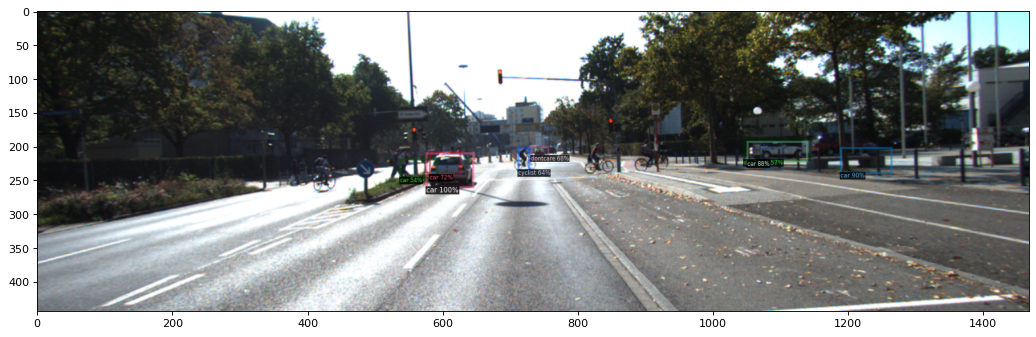

In [10]:
# Visualize
!(cd detectron2-ResNeSt/ && python3 tools/train_kitti.py \
  --config-file configs/kitti/kitti-faster-rcnn-resnest-101.yaml MODEL.WEIGHTS ../resnest_101.pth)


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 16), dpi=80, facecolor='w', edgecolor='k')
img=mpimg.imread('detectron2-ResNeSt/prediction.png')
imgplot = plt.imshow(img)
plt.show()